In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import make_scorer


from imp import reload
import MyPrepaData
reload(MyPrepaData)
from MyEvalCriteria import mae,rmse,corr,KGE,ia,BHV

%matplotlib inline

In [2]:
micQ1 = pd.read_excel('result.xls',index_col=1,header=None)
reanalysis = micQ1.index[:8]
reanalysis

Index(['stl3', 'd2m', 'tcwv', 'tcw', 'stl2', 'mn2t', 'tsn', 'stl4'], dtype='object', name=1)

In [256]:
param_grid = {'max_depth': range(1,11),
              'min_samples_leaf': range(1,51,5), 
              'max_leaf_nodes':range(2,41,2),
              'min_samples_split':range(2,41,2),
              }
for leadtime in range(1,11):
    est = GradientBoostingRegressor(learning_rate=0.1, random_state=10, n_estimators=100)
    
    X,y = MyPrepaData.Preparation(data=data,Qlag=[1,4],Rlag=range(1,7),reanalysis=reanalysis,isreanalysis=True,leadtime=leadtime)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=730,shuffle=False)
    length = X_train.shape[0]
    tscv = [([_ for _ in range(length-731)],[_ for _ in range(length-731,length)]) for i in range(1)]
    %time gs_cv = GridSearchCV(est, param_grid, scoring=make_scorer(mae,greater_is_better=False),\
                               cv = tscv ,n_jobs=-1,verbose=1).fit(X_train.values,y_train.values)
    with open('gbrt_para%d.pickle'%leadtime, 'wb') as f:
        pickle.dump(gs_cv,f)
    print(gs_cv.best_params_,gs_cv.best_score_)

Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 332 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 2732 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 4532 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 6732 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8102 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 9602 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 11302 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 13202 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 15302 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 17602 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 19997 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 21347 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 22797 tas

Wall time: 22min 4s
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 6, 'min_samples_split': 16} -125.5868285156934
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9010 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10510 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12210 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 14110 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 16210 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 18202 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 19452 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 20802 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 22252 ta

Wall time: 22min 30s
{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 6, 'min_samples_split': 16} -153.84379710965814
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 4828 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 6328 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 12028 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 14328 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 16828 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 18703 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 20153 tasks 

Wall time: 23min 20s
{'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 6, 'min_samples_split': 2} -177.20394494435644
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 4510 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 5610 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6910 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8410 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 10110 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 11312 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 12362 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 13512 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 14762 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 16112 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 17562 tas

Wall time: 23min 40s
{'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 11, 'min_samples_split': 34} -192.72587895502693
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 4828 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 6328 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 12028 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 14328 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 16828 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 18317 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 19767 tasks 

Wall time: 22min 35s
{'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 32} -199.83383552869208
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 5968 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7268 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8768 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 10468 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 12368 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 13989 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 15139 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 16389 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 17739 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 19189 tas

Wall time: 23min 14s
{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 36} -215.28527354262673
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9080 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10580 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 14180 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 16280 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 18580 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 21080 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 23028 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 24478 ta

Wall time: 21min 41s
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 46, 'min_samples_split': 2} -224.0534559724497
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8986 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10486 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12186 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 14086 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 16186 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 17598 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 18848 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 20198 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 21648 ta

Wall time: 21min 55s
{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 46, 'min_samples_split': 2} -233.67178740900977
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9010 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10510 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 12210 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 14110 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 16210 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 18094 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 19344 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 20694 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 22144 ta

Wall time: 22min 30s
{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 11, 'min_samples_split': 38} -237.3601081906223
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 4828 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 6328 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 12028 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 14328 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 16828 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 19528 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 22156 tasks 

Wall time: 20min 47s
{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 8} -243.7606744990642


In [23]:
optpara = []
for leadtime in range(1,11):
    bestpara = []
    bestscore = []
    with open('gbrt_para%d.pickle'%(leadtime), 'rb') as f:
        result = pickle.load(f)
        bestpara.append(result.best_params_)
        bestscore.append(result.best_score_)
#     print(-max(bestscore))
    optpara.append(bestpara[bestscore.index(max(bestscore))])
with open('gbrt_allpara.pickle', 'wb') as f:
            pickle.dump(optpara,f)

125.03499043174489
153.6544116802135
176.00736790599356
192.43293110861043
199.14175120968176
216.68489037431712
224.3698242892771
233.79444037541683
238.0307035125584
243.56934104822867


In [265]:
with open('gbrt_allpara.pickle', 'rb') as f:
    optpara = pickle.load(f)
min_samples_split= [_['min_samples_split'] for _ in optpara]
min_samples_leaf = [_['min_samples_leaf'] for _ in optpara]
max_depth = [_['max_depth'] for _ in optpara]
max_leaf_nodes = [_['max_leaf_nodes'] for _ in optpara]

for leadtime in range(1,11):
    param_grid = {'n_estimators': range(100,4001,100),
          'learning_rate': [0.01], 
          }
    est = GradientBoostingRegressor(min_samples_split= min_samples_split[leadtime-1],
                                          max_depth = max_depth[leadtime-1],max_leaf_nodes=max_leaf_nodes[leadtime-1],
                                          min_samples_leaf=min_samples_leaf[leadtime-1],random_state=10)
    X,y = Preparation(data=data,Qlag=[1,4],Rlag=range(1,7),reanalysis=reanalysis,isreanalysis=True,leadtime=leadtime)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=730,shuffle=False)
    length = X_train.shape[0]
    tscv = [([_ for _ in range(length-731)],[_ for _ in range(length-731,length)]) for i in range(1)]
    %time gs_cv = GridSearchCV(est, param_grid, scoring=make_scorer(mae,greater_is_better=False),\
                               cv = tscv ,n_jobs=12,verbose=1).fit(X_train.values,y_train.values)
    with open('gbrt_para_learn_est%d.pickle'%(leadtime), 'wb') as f:
        pickle.dump(gs_cv,f)
    print(gs_cv.best_params_,gs_cv.best_score_)

Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   19.3s finished


Wall time: 26.2 s
{'learning_rate': 0.01, 'n_estimators': 3800} -124.93798489156994
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   26.7s finished


Wall time: 32.8 s
{'learning_rate': 0.01, 'n_estimators': 2700} -153.9928194072676
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   33.2s finished


Wall time: 36.8 s
{'learning_rate': 0.01, 'n_estimators': 1300} -179.28208422067976
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   26.1s finished


Wall time: 28 s
{'learning_rate': 0.01, 'n_estimators': 900} -195.93959587276495
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   36.7s finished


Wall time: 39.7 s
{'learning_rate': 0.01, 'n_estimators': 1000} -203.10591384437276
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   18.7s finished


Wall time: 19.9 s
{'learning_rate': 0.01, 'n_estimators': 700} -216.72023264854346
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 out of  40 | elapsed:    4.1s remaining:    5.6s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   14.2s finished


Wall time: 15.7 s
{'learning_rate': 0.01, 'n_estimators': 1400} -225.83967245258893
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 out of  40 | elapsed:    3.9s remaining:    5.3s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   13.9s finished


Wall time: 16 s
{'learning_rate': 0.01, 'n_estimators': 2000} -233.95618476312077
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   20.7s finished


Wall time: 22.7 s
{'learning_rate': 0.01, 'n_estimators': 1300} -239.5760740285998
Fitting 1 folds for each of 40 candidates, totalling 40 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 out of  40 | elapsed:    4.3s remaining:    5.9s
[Parallel(n_jobs=12)]: Done  40 out of  40 | elapsed:   16.8s finished


Wall time: 18.6 s
{'learning_rate': 0.01, 'n_estimators': 1200} -243.97890594655084


In [266]:
optpara = []
for leadtime in range(1,11):
    with open('gbrt_para_learn_est%d.pickle'%(leadtime), 'rb') as f:
        result = pickle.load(f)
        optpara.append(result.best_params_)
with open('gbrt_allpara_learn_est.pickle', 'wb') as f:
    pickle.dump(optpara,f)

# GBRT没有再分析数据优化参数

In [267]:
param_grid = {'max_depth': range(1,11),
              'min_samples_leaf': range(1,51,5), 
              'max_leaf_nodes':range(2,41,2),
              'min_samples_split':range(2,41,2),
              }
est = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=10)
for leadtime in range(1,11):
    X,y = MyPrepaData.Preparation(data=data,Qlag=[1,4],Rlag=range(1,7),reanalysis=reanalysis,isreanalysis=False,leadtime=leadtime)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=730,shuffle=False)
    length = X_train.shape[0]
    tscv = [([_ for _ in range(length-731)],[_ for _ in range(length-731,length)]) for i in range(1)]
    %time gs_cv = GridSearchCV(est, param_grid, scoring=make_scorer(mae,greater_is_better=False),\
                               cv = tscv ,n_jobs=8,verbose=1).fit(X_train.values,y_train.values)
    with open('gbrt_para_nore%d.pickle'%leadtime, 'wb') as f:
        pickle.dump(gs_cv,f)
    print(gs_cv.best_params_,gs_cv.best_score_)

Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 1307 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 3807 tasks      | elapsed:   22.0s
[Parallel(n_jobs=8)]: Done 7147 tasks      | elapsed:   50.7s
[Parallel(n_jobs=8)]: Done 9397 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 12147 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 14719 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 16219 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 17919 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 19819 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 21919 tasks      | elapsed:  5.1min
[Parallel(n_jobs=8)]: Done 24219 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 26719 tasks      | elapsed:  6.9min
[Parallel(n_jobs=8)]: Done 29419 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done 32319 tasks      | ela

Wall time: 12min 46s
{'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 6, 'min_samples_split': 18} -130.0282592082776
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1360 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 3360 tasks      | elapsed:   20.1s
[Parallel(n_jobs=8)]: Done 6160 tasks      | elapsed:   44.8s
[Parallel(n_jobs=8)]: Done 9184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 11384 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 13984 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 16984 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 19674 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 21574 tasks      | elapsed:  4.8min
[Parallel(n_jobs=8)]: Done 23674 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done 25974 tasks      | elapsed:  6.4min
[Parallel(n_jobs=8)]: Done 28474 tasks      | elapsed:  7.3min
[Parallel(n_jobs=8)]: Done 31174 tasks      | elapsed:  8.4min
[Parallel(n_jobs=8)]: Done 34074 tasks      | ela

Wall time: 12min 11s
{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 31, 'min_samples_split': 2} -162.98585138712258
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1360 tasks      | elapsed:    8.2s
[Parallel(n_jobs=8)]: Done 3360 tasks      | elapsed:   19.8s
[Parallel(n_jobs=8)]: Done 6160 tasks      | elapsed:   44.7s
[Parallel(n_jobs=8)]: Done 9760 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 12008 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 14608 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 17368 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 19068 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 20968 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done 23068 tasks      | elapsed:  5.2min
[Parallel(n_jobs=8)]: Done 25368 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done 27868 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done 30568 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 33468 tasks      | ela

Wall time: 12min 15s
{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 16} -193.26480859759943
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 1360 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 3360 tasks      | elapsed:   22.0s
[Parallel(n_jobs=8)]: Done 6160 tasks      | elapsed:   49.0s
[Parallel(n_jobs=8)]: Done 9760 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 13636 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 16236 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 19236 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done 22636 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Done 24884 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done 26984 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done 29284 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done 31784 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 34484 tasks      | elapsed: 10.0min
[Parallel(n_jobs=8)]: Done 37384 tasks      | ela

Wall time: 12min 26s
{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 16} -214.44765281508435
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 1360 tasks      | elapsed:    8.1s
[Parallel(n_jobs=8)]: Done 3360 tasks      | elapsed:   21.0s
[Parallel(n_jobs=8)]: Done 6160 tasks      | elapsed:   45.8s
[Parallel(n_jobs=8)]: Done 9760 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 13484 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 16084 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 19084 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 22484 tasks      | elapsed:  5.0min
[Parallel(n_jobs=8)]: Done 26284 tasks      | elapsed:  6.3min
[Parallel(n_jobs=8)]: Done 30484 tasks      | elapsed:  7.9min
[Parallel(n_jobs=8)]: Done 33402 tasks      | elapsed:  9.0min
[Parallel(n_jobs=8)]: Done 35902 tasks      | elapsed: 10.2min
[Parallel(n_jobs=8)]: Done 38602 tasks      | elapsed: 11.3min
[Parallel(n_jobs=8)]: Done 40000 out of 40000 | e

Wall time: 12min 3s
{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 24} -229.57528700685756
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 1696 tasks      | elapsed:   10.4s
[Parallel(n_jobs=8)]: Done 4196 tasks      | elapsed:   26.6s
[Parallel(n_jobs=8)]: Done 7696 tasks      | elapsed:   59.1s
[Parallel(n_jobs=8)]: Done 10471 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done 13221 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 14686 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 16186 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 17886 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 19786 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done 21886 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done 24186 tasks      | elapsed:  5.8min
[Parallel(n_jobs=8)]: Done 26686 tasks      | elapsed:  6.7min
[Parallel(n_jobs=8)]: Done 29386 tasks      | elapsed:  7.7min
[Parallel(n_jobs=8)]: Done 32286 tasks      | el

Wall time: 12min 17s
{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 31, 'min_samples_split': 2} -243.6838633210695
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1696 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done 4196 tasks      | elapsed:   25.4s
[Parallel(n_jobs=8)]: Done 6326 tasks      | elapsed:   49.7s
[Parallel(n_jobs=8)]: Done 8576 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 11326 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 14561 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 16061 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 17761 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 19661 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done 21761 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done 24061 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 26561 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done 29261 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 31650 tasks      | ela

Wall time: 13min 51s
{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 6, 'min_samples_split': 16} -247.08168977529832
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 1360 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 3360 tasks      | elapsed:   19.7s
[Parallel(n_jobs=8)]: Done 6160 tasks      | elapsed:   44.1s
[Parallel(n_jobs=8)]: Done 9448 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 11648 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 14248 tasks      | elapsed:  2.4min
[Parallel(n_jobs=8)]: Done 17248 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 20648 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done 23572 tasks      | elapsed:  5.4min
[Parallel(n_jobs=8)]: Done 25672 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 27972 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 30472 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 33172 tasks      | elapsed:  9.3min
[Parallel(n_jobs=8)]: Done 36072 tasks      | ela

Wall time: 12min 35s
{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} -256.81280271446735
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1024 tasks      | elapsed:    7.1s
[Parallel(n_jobs=8)]: Done 2524 tasks      | elapsed:   17.7s
[Parallel(n_jobs=8)]: Done 4624 tasks      | elapsed:   35.9s
[Parallel(n_jobs=8)]: Done 7324 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 10624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 14524 tasks      | elapsed:  2.6min
[Parallel(n_jobs=8)]: Done 18895 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 21445 tasks      | elapsed:  4.6min
[Parallel(n_jobs=8)]: Done 24295 tasks      | elapsed:  5.6min
[Parallel(n_jobs=8)]: Done 27445 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done 30895 tasks      | elapsed:  8.1min
[Parallel(n_jobs=8)]: Done 34645 tasks      | elapsed:  9.6min
[Parallel(n_jobs=8)]: Done 38695 tasks      | elapsed: 11.2min
[Parallel(n_jobs=8)]: Done 39985 out of 40000 | e

Wall time: 11min 53s
{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 6, 'min_samples_split': 2} -261.98115226359465
Fitting 1 folds for each of 40000 candidates, totalling 40000 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 1360 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 3360 tasks      | elapsed:   19.3s
[Parallel(n_jobs=8)]: Done 6160 tasks      | elapsed:   42.5s
[Parallel(n_jobs=8)]: Done 9760 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 12572 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 15172 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 18172 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 21572 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done 23656 tasks      | elapsed:  5.5min
[Parallel(n_jobs=8)]: Done 25756 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done 28056 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 30556 tasks      | elapsed:  8.2min
[Parallel(n_jobs=8)]: Done 33256 tasks      | elapsed:  9.4min
[Parallel(n_jobs=8)]: Done 36156 tasks      | ela

Wall time: 13min 15s
{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} -266.05603290029245


In [268]:
optpara = []
for leadtime in range(1,11):
    with open('gbrt_para_nore%d.pickle'%(leadtime), 'rb') as f:
        result = pickle.load(f)
        optpara.append(result.best_params_)
with open('gbrt_allpara_nore.pickle', 'wb') as f:
    pickle.dump(optpara,f)

In [269]:
with open('gbrt_allpara_nore.pickle', 'rb') as f:
    optpara = pickle.load(f)
min_samples_split= [_['min_samples_split'] for _ in optpara]
min_samples_leaf = [_['min_samples_leaf'] for _ in optpara]
max_depth = [_['max_depth'] for _ in optpara]
max_leaf_nodes = [_['max_leaf_nodes'] for _ in optpara]

for leadtime in range(1,11):
    param_grid = {'n_estimators':range(100,4001,100),
          'learning_rate': [0.01],
          }
    est = GradientBoostingRegressor(min_samples_split= min_samples_split[leadtime-1],
                                          max_depth = max_depth[leadtime-1],max_leaf_nodes=max_leaf_nodes[leadtime-1],
                                          min_samples_leaf=min_samples_leaf[leadtime-1],random_state=10)
    X,y = Preparation(data=data,Qlag=[1,4],Rlag=range(1,7),reanalysis=reanalysis,isreanalysis=False,leadtime=leadtime)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=730,shuffle=False)
    length = X_train.shape[0]
    tscv = [([_ for _ in range(length-731)],[_ for _ in range(length-731,length)]) for i in range(5)]
    %time gs_cv = GridSearchCV(est, param_grid, scoring=make_scorer(mae,greater_is_better=False),\
                               cv = tscv ,n_jobs=6,verbose=1).fit(X_train.values,y_train.values)
    with open('gbrt_para_learn_est%d_nore.pickle'%(leadtime), 'wb') as f:
        pickle.dump(gs_cv,f)
    print(gs_cv.best_params_,gs_cv.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  62 tasks      | elapsed:    7.5s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   56.7s finished


Wall time: 57.7 s
{'learning_rate': 0.01, 'n_estimators': 1100} -130.89342848930474
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 132 tasks      | elapsed:   20.8s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   44.0s finished


Wall time: 44.5 s
{'learning_rate': 0.01, 'n_estimators': 900} -163.20544759775686
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 126 tasks      | elapsed:   19.7s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   48.9s finished


Wall time: 49.6 s
{'learning_rate': 0.01, 'n_estimators': 1200} -193.75425316438844
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 132 tasks      | elapsed:   23.4s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   45.2s finished


Wall time: 45.6 s
{'learning_rate': 0.01, 'n_estimators': 700} -214.4519502097778
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   54.6s finished


Wall time: 55.4 s
{'learning_rate': 0.01, 'n_estimators': 700} -229.6923012968204
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 137 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   29.7s finished


Wall time: 30.3 s
{'learning_rate': 0.01, 'n_estimators': 1200} -243.00476840482557
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  61 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:  1.0min finished


Wall time: 1min 3s
{'learning_rate': 0.01, 'n_estimators': 600} -247.11546006892985
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 134 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   31.5s finished


Wall time: 32.2 s
{'learning_rate': 0.01, 'n_estimators': 1100} -256.3562121220269
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 106 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   33.5s finished


Wall time: 33.9 s
{'learning_rate': 0.01, 'n_estimators': 900} -261.23785895318986
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 172 tasks      | elapsed:   18.5s
[Parallel(n_jobs=6)]: Done 189 out of 200 | elapsed:   21.4s remaining:    1.2s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:   23.1s finished


Wall time: 23.4 s
{'learning_rate': 0.01, 'n_estimators': 900} -266.5111025281714


In [270]:
optpara = []
for leadtime in range(1,11):
    with open('gbrt_para_learn_est%d_nore.pickle'%(leadtime), 'rb') as f:
        result = pickle.load(f)
        optpara.append(result.best_params_)
with open('gbrt_allpara_learn_est_nore.pickle', 'wb') as f:
    pickle.dump(optpara,f)

In [32]:
# show parameters of GBRT and GBRTMIC
names = locals()
for label in ['','_nore']:
    n_estimators = []
    max_leaf_nodes = []
    min_samples_leaf = []
    max_depth = []
    min_samples_split = []
    with open('gbrt_allpara_learn_est%s.pickle'%label, 'rb') as f:
        result = pickle.load(f)
        for r in result:
            n_estimators.append(r['n_estimators'])
    print('GBRT%s-n_estimators:'%label,end='')
    for n in n_estimators:
        print(n,end=',')
    print()

    with open('gbrt_allpara%s.pickle'%label, 'rb') as f:
        result = pickle.load(f)
        for r in result:
            for na in ['max_leaf_nodes','min_samples_leaf','max_depth','min_samples_split']:
                names[na].append(r[na])
        for na in ['max_leaf_nodes','min_samples_leaf','max_depth','min_samples_split']:
            print('GBRT%s-%s:'%(label,na),end='')
            for m in names[na]:
                print(m,end=',')
            print()
    print('*'*50)

GBRT-n_estimators:3800,2700,1300,900,1000,700,1400,2000,1300,1200,
GBRT-max_leaf_nodes:7,9,13,7,15,4,5,4,4,17,
GBRT-min_samples_leaf:2,7,2,4,2,1,10,10,8,1,
GBRT-max_depth:4,6,8,5,9,9,2,2,7,2,
GBRT-min_samples_split:18,15,12,13,8,3,19,3,19,8,
**************************************************
GBRT_nore-n_estimators:1100,900,1200,700,700,1200,600,1100,900,900,
GBRT_nore-max_leaf_nodes:8,4,4,4,4,2,4,2,2,2,
GBRT_nore-min_samples_leaf:6,31,1,1,1,31,6,1,6,1,
GBRT_nore-max_depth:3,2,2,2,3,1,3,1,1,1,
GBRT_nore-min_samples_split:18,2,16,16,24,2,16,2,2,2,
**************************************************


# SVR 优化模型参数

In [17]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {'C': np.linspace(1,100,20),
              'gamma': np.linspace(0.001,0.1,20), 
              'epsilon':np.linspace(0.0001,0.01,20),
              }
for leadtime in range(1,11):
    X,y = Preparation(data=data,Qlag=[1,4],Rlag=range(1,7),reanalysis=reanalysis,isreanalysis=True,leadtime=leadtime)
    scalemodely = MinMaxScaler().fit(np.array(y).reshape(-1, 1)) 
    scalemodelx = MinMaxScaler().fit(X)
    y_scale = scalemodely.transform(np.array(y).reshape(-1, 1))
    X_scale = scalemodelx.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scale,y_scale,test_size=730,shuffle=False)
    length = X_train.shape[0]
    tscv = [([_ for _ in range(length-731)],[_ for _ in range(length-731,length)]) for i in range(1)]
    est = SVR() 
    %time gs_cv = GridSearchCV(est, param_grid, scoring=make_scorer(mae,greater_is_better=False),\
                               cv = tscv ,n_jobs=12,verbose=1).fit(X_train,y_train)
    with open('svr_para%d.pickle'%(leadtime), 'wb') as f:
        pickle.dump(gs_cv,f)
    print(gs_cv.best_params_,gs_cv.best_score_)

Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 254 tasks      | elapsed:    6.1s
[Parallel(n_jobs=12)]: Done 504 tasks      | elapsed:   11.0s
[Parallel(n_jobs=12)]: Done 854 tasks      | elapsed:   18.8s
[Parallel(n_jobs=12)]: Done 1304 tasks      | elapsed:   31.2s
[Parallel(n_jobs=12)]: Done 1854 tasks      | elapsed:   48.9s
[Parallel(n_jobs=12)]: Done 2504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 3254 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 4104 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 5054 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 6104 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 7254 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  6.8min finished


Wall time: 6min 50s
{'C': 6.2105263157894735, 'epsilon': 0.0068736842105263166, 'gamma': 0.03226315789473684} -0.02144091343069382
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.8s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   34.1s
[Parallel(n_jobs=12)]: Done 2252 tasks      | elapsed:   58.8s
[Parallel(n_jobs=12)]: Done 2802 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 3452 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 4202 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 5052 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 6002 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 7052 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  6.4min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 6min 24s
{'C': 1.0, 'epsilon': 0.008436842105263158, 'gamma': 0.05831578947368421} -0.02638720020340654
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.4s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.2s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   33.5s
[Parallel(n_jobs=12)]: Done 2263 tasks      | elapsed:   57.2s
[Parallel(n_jobs=12)]: Done 2813 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 3463 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 4213 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 5063 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 6013 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 7063 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  6.1min finished


Wall time: 6min 8s
{'C': 1.0, 'epsilon': 0.0016631578947368423, 'gamma': 0.08436842105263158} -0.029990157384471746
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.8s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   34.0s
[Parallel(n_jobs=12)]: Done 2260 tasks      | elapsed:   58.0s
[Parallel(n_jobs=12)]: Done 2810 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 3460 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 4210 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 5060 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 6010 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 7060 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  6.1min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 6min 6s
{'C': 1.0, 'epsilon': 0.00791578947368421, 'gamma': 0.02705263157894737} -0.032044313559217295
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.6s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   33.6s
[Parallel(n_jobs=12)]: Done 2270 tasks      | elapsed:   57.1s
[Parallel(n_jobs=12)]: Done 2820 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 3470 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 4220 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 5070 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 6020 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 7070 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  5.9min finished


Wall time: 5min 54s
{'C': 11.421052631578947, 'epsilon': 0.0016631578947368423, 'gamma': 0.006210526315789474} -0.03378306834129117
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.7s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   33.4s
[Parallel(n_jobs=12)]: Done 2428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 3008 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 3658 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 4408 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 5258 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 6208 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 7258 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  5.9min finished


Wall time: 5min 53s
{'C': 1.0, 'epsilon': 0.0001, 'gamma': 0.021842105263157895} -0.03484717007379201
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.5s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   33.8s
[Parallel(n_jobs=12)]: Done 2428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 3010 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 3660 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 4410 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 5260 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 6210 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 7260 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  5.8min finished


Wall time: 5min 48s
{'C': 1.0, 'epsilon': 0.0021842105263157894, 'gamma': 0.03747368421052632} -0.03556332827967928
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.7s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.8s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   33.2s
[Parallel(n_jobs=12)]: Done 2428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 3010 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 3660 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 4410 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 5260 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 6210 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 7260 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  5.7min finished


Wall time: 5min 43s
{'C': 6.2105263157894735, 'epsilon': 0.0006210526315789474, 'gamma': 0.01663157894736842} -0.03593469652284178
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.3s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   33.1s
[Parallel(n_jobs=12)]: Done 2428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 3210 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 3860 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 4610 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 5460 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 6410 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 7460 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  5.6min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 5min 36s
{'C': 1.0, 'epsilon': 0.004789473684210527, 'gamma': 0.06873684210526315} -0.03693100181806052
Fitting 1 folds for each of 8000 candidates, totalling 8000 fits


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.6s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   15.5s
[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:   32.8s
[Parallel(n_jobs=12)]: Done 2428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 3010 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 3660 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 4410 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 5260 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 6210 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 7260 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 8000 out of 8000 | elapsed:  5.7min finished


Wall time: 5min 40s
{'C': 6.2105263157894735, 'epsilon': 0.004268421052631579, 'gamma': 0.01663157894736842} -0.03765432962147253


In [13]:
# show parameters of SVR
C = []
epsilon = []
gamma = []
for leadtime in range(1,11):
    with open('svr_para%d.pickle'%(leadtime), 'rb') as f:
        gs_cv = pickle.load(f)
#         print(gs_cv.best_params_, gs_cv.best_score_)
        C.append(gs_cv.best_params_['C'])
        epsilon.append(gs_cv.best_params_['epsilon'])
        gamma.append(gs_cv.best_params_['gamma'])
dfpara = pd.DataFrame({'C':C,'epsilon':epsilon,'gamma':gamma})
dfpara.applymap(lambda x: '%.4f'%x).T

,0,1,2,3,4,5,6,7,8,9
C,6.2105,1.0000,1.0000,1.0000,11.4211,1.0000,1.0000,6.2105,1.0000,6.2105
epsilon,0.0069,0.0084,0.0017,0.0079,0.0017,0.0001,0.0022,0.0006,0.0048,0.0043
gamma,0.0323,0.0583,0.0844,0.0271,0.0062,0.0218,0.0375,0.0166,0.0687,0.0166


# ANN参数率定

In [32]:
from sklearn.neural_network import MLPRegressor

In [35]:
param_grid = {'hidden_layer_sizes': [(_,) for _ in range(2,21,1)],
              'activation': ['identity','relu','logistic','tanh']
              }
for leadtime in range(1,11):
    X,y = Preparation(data=data,Qlag=[1,4],Rlag=range(1,7),reanalysis=reanalysis,isreanalysis=True,leadtime=leadtime)
    scalemodely = MinMaxScaler().fit(np.array(y).reshape(-1, 1)) 
    scalemodelx = MinMaxScaler().fit(X)
    y_scale = scalemodely.transform(np.array(y).reshape(-1, 1))
    X_scale = scalemodelx.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scale,y_scale,test_size=730,shuffle=False)
    length = X_train.shape[0]
    tscv = [([_ for _ in range(length-731)],[_ for _ in range(length-731,length)]) for i in range(itera)]
    est = MLPRegressor(solver='lbfgs', alpha=0.0001,batch_size='auto', 
                             learning_rate='constant',learning_rate_init=0.001, power_t=0.5,max_iter=3000, shuffle=True, 
                             random_state=None,tol=1e-5, verbose=False, warm_start=False,momentum=0.9, 
                             nesterovs_momentum=True,early_stopping=True, validation_fraction=0.1,beta_1=0.9, 
                             beta_2=0.999, epsilon=1e-08,n_iter_no_change=10) 
    %time gs_cv = GridSearchCV(est, param_grid, scoring=make_scorer(mae,greater_is_better=False),\
                               cv = tscv ,n_jobs=12,verbose=1).fit(X_train,y_train)
    with open('ann_para%d.pickle'%(leadtime), 'wb') as f:
        pickle.dump(gs_cv,f)
    print(gs_cv.best_params_,gs_cv.best_score_)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 798 tasks      | elapsed:    9.9s
[Parallel(n_jobs=12)]: Done 1548 tasks      | elapsed:   23.4s
[Parallel(n_jobs=12)]: Done 1954 tasks      | elapsed:   36.8s
[Parallel(n_jobs=12)]: Done 2404 tasks      | elapsed:   44.1s
[Parallel(n_jobs=12)]: Done 2954 tasks      | elapsed:   56.9s
[Parallel(n_jobs=12)]: Done 3604 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  1.8min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 1min 47s
{'activation': 'tanh', 'hidden_layer_sizes': (5,)} -0.02206226524030604
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 632 tasks      | elapsed:    6.9s
[Parallel(n_jobs=12)]: Done 1466 tasks      | elapsed:   22.6s
[Parallel(n_jobs=12)]: Done 1816 tasks      | elapsed:   41.2s
[Parallel(n_jobs=12)]: Done 2266 tasks      | elapsed:   55.5s
[Parallel(n_jobs=12)]: Done 2816 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 3466 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  3.3min finished


Wall time: 3min 16s
{'activation': 'tanh', 'hidden_layer_sizes': (3,)} -0.02774835074111245
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 750 tasks      | elapsed:   11.6s
[Parallel(n_jobs=12)]: Done 1370 tasks      | elapsed:   26.5s
[Parallel(n_jobs=12)]: Done 1720 tasks      | elapsed:   46.8s
[Parallel(n_jobs=12)]: Done 2170 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 2720 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 3370 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  4.8min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 4min 50s
{'activation': 'logistic', 'hidden_layer_sizes': (2,)} -0.03139300817208598
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 663 tasks      | elapsed:   11.7s
[Parallel(n_jobs=12)]: Done 1037 tasks      | elapsed:   21.4s
[Parallel(n_jobs=12)]: Done 1387 tasks      | elapsed:   32.8s
[Parallel(n_jobs=12)]: Done 1837 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 2387 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 3037 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  6.3min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 6min 19s
{'activation': 'logistic', 'hidden_layer_sizes': (2,)} -0.034360577212713905
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.9s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   21.5s
[Parallel(n_jobs=12)]: Done 1202 tasks      | elapsed:   31.7s
[Parallel(n_jobs=12)]: Done 1652 tasks      | elapsed:   59.2s
[Parallel(n_jobs=12)]: Done 2202 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 2852 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 3602 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  8.5min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 8min 28s
{'activation': 'logistic', 'hidden_layer_sizes': (2,)} -0.03601524192005468
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:    5.7s
[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:   19.2s
[Parallel(n_jobs=12)]: Done 1401 tasks      | elapsed:   38.1s
[Parallel(n_jobs=12)]: Done 1851 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 2401 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 3051 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  8.2min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 8min 11s
{'activation': 'logistic', 'hidden_layer_sizes': (2,)} -0.038458861248601345
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 632 tasks      | elapsed:   10.4s
[Parallel(n_jobs=12)]: Done 1192 tasks      | elapsed:   21.8s
[Parallel(n_jobs=12)]: Done 1631 tasks      | elapsed:   45.3s
[Parallel(n_jobs=12)]: Done 2081 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 2631 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 3281 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  8.4min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 8min 26s
{'activation': 'logistic', 'hidden_layer_sizes': (2,)} -0.039964740360519606
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 747 tasks      | elapsed:   10.8s
[Parallel(n_jobs=12)]: Done 1337 tasks      | elapsed:   25.6s
[Parallel(n_jobs=12)]: Done 1687 tasks      | elapsed:   48.4s
[Parallel(n_jobs=12)]: Done 2137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 2687 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 3337 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed:  8.8min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 8min 49s
{'activation': 'logistic', 'hidden_layer_sizes': (2,)} -0.04038546211359115
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 738 tasks      | elapsed:   11.3s
[Parallel(n_jobs=12)]: Done 1304 tasks      | elapsed:   25.1s
[Parallel(n_jobs=12)]: Done 1654 tasks      | elapsed:   51.6s
[Parallel(n_jobs=12)]: Done 2104 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 2654 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 3304 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed: 10.6min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 10min 37s
{'activation': 'logistic', 'hidden_layer_sizes': (2,)} -0.04168372037740585
Fitting 50 folds for each of 76 candidates, totalling 3800 fits


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 612 tasks      | elapsed:   11.1s
[Parallel(n_jobs=12)]: Done 1076 tasks      | elapsed:   21.8s
[Parallel(n_jobs=12)]: Done 1426 tasks      | elapsed:   36.2s
[Parallel(n_jobs=12)]: Done 1876 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 2426 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 3076 tasks      | elapsed:  5.9min


Wall time: 10min 50s
{'activation': 'tanh', 'hidden_layer_sizes': (2,)} -0.04236489193413391


[Parallel(n_jobs=12)]: Done 3800 out of 3800 | elapsed: 10.8min finished


In [142]:
names = locals()
for leadtime in range(1,11):
    with open('ann_para%d.pickle'%(leadtime), 'rb') as f:
        gs_cv = pickle.load(f)
    para_result = pd.DataFrame.from_dict(gs_cv.cv_results_)
    col = ['param_activation', 'param_hidden_layer_sizes']+['split%d_test_score'%__ for __ in range(itera)]
    para_result = para_result[col]
    
    para_result.param_hidden_layer_sizes = para_result.param_hidden_layer_sizes.apply(lambda x:int(x[0]))
    para_result = para_result.set_index(['param_activation', 'param_hidden_layer_sizes'])
    para_result_b = para_result['split0_test_score']
    for i in para_result.columns[1:]:
        para_result_b = pd.concat([para_result_b,para_result[i]],axis=0)
    para_result_b.name = 'MAE'
    para_result_b = para_result_b.reset_index()
    para_result_b.MAE = para_result_b.MAE.apply(lambda x:-x)
    names['para_result%d'%leadtime] = para_result_b

## 绘图数据（无缩放） 

In [20]:
%%time
idx = pd.IndexSlice
itera = 50
for leadtime in range(1,11):
    X, y =  Preparation(data=data,Qlag=[1,4],Rlag=range(1,7),reanalysis=reanalysis,isreanalysis=True,leadtime=leadtime)
    scalemodely = MinMaxScaler().fit(np.array(y).reshape(-1, 1)) 
    scalemodelx = MinMaxScaler().fit(X)
    y_scale = scalemodely.transform(np.array(y).reshape(-1, 1))
    X_scale = scalemodelx.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scale,y_scale,test_size=730,shuffle=False)
    X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train,y_train,test_size=731,shuffle=False)
    para = pd.DataFrame(columns=pd.MultiIndex.from_product([range(2,21,1),['identity','relu','logistic','tanh'],['train_mae','test_mae']]),index = range(itera))
    for node,activation in pd.MultiIndex.from_product([range(2,21,1),['identity','relu','logistic','tanh']]):
        model = MLPRegressor(hidden_layer_sizes=(node,), activation=activation, solver='lbfgs', alpha=0.0001,batch_size='auto', 
                             learning_rate='constant',learning_rate_init=0.001, power_t=0.5,max_iter=3000, shuffle=True, 
                             random_state=None,tol=1e-5, verbose=False, warm_start=False,momentum=0.9, 
                             nesterovs_momentum=True,early_stopping=True, validation_fraction=0.1,beta_1=0.9, 
                             beta_2=0.999, epsilon=1e-08,n_iter_no_change=10)
        train_mae = []
        test_mae = []
        for i in range(itera): # 优选模型参数时，不能使用测试集
            model.fit(X_train_val,y_train_val.ravel())
            y_fit = model.predict(X_train_val)
            y_fit_val = model.predict(X_test_val)
            y_train_val_,y_test_val_,y_fit_,y_fit_val_ = scalemodely.inverse_transform(y_train_val.reshape(-1, 1)),\
            scalemodely.inverse_transform(y_test_val.reshape(-1, 1)),\
            scalemodely.inverse_transform(y_fit.reshape(-1, 1)),scalemodely.inverse_transform(y_fit_val.reshape(-1, 1))
            para.loc[i,idx[[node],activation,:]] = [mae(y_train_val_,y_fit_),mae(y_test_val_,y_fit_val_)]           
    para.to_csv('leadtime%d_lbfgs_self.csv'%leadtime)
    print(leadtime,'/','10')

1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Wall time: 4h 19min 22s


In [5]:
# 查看最优化参数
ANNpara = []
for leadtime in range(1,11):
    idx = pd.IndexSlice
    para = pd.read_csv('leadtime%d_lbfgs_self.csv' % leadtime, index_col=0, header=[0, 1, 2])
    temp = para.loc[:,idx[:,:,'test_mae']].median().idxmin()
    ANNpara.append((temp[0],temp[1]))
ANNpara

[('4', 'tanh'),
 ('2', 'tanh'),
 ('3', 'logistic'),
 ('2', 'logistic'),
 ('2', 'logistic'),
 ('2', 'logistic'),
 ('2', 'logistic'),
 ('2', 'logistic'),
 ('2', 'tanh'),
 ('2', 'tanh')]

           MAE Activation function  Number of nodes
0   252.626762            logistic                2
1   237.673118            logistic                2
2   251.717471            logistic                2
3   275.693547            logistic                2
4   237.532637            logistic                2
..         ...                 ...              ...
43  266.161492                relu               20
44  252.380132                relu               20
45  311.959613                relu               20
46  301.189295                relu               20
47  330.105039                relu               20

[3648 rows x 3 columns]


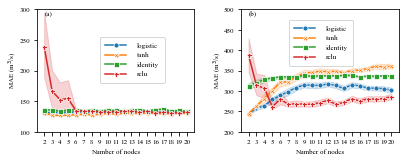

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="whitegrid")
from matplotlib import rcParams
rcParams.update({'font.size': 7})
rcParams['font.sans-serif'] = 'Times New Roman'
paralegend = {'title':None,'frameon':None,'handlelength':3,'handletextpad':1.5,'borderpad':0.8}
# 读取数据
def readdata(leadtime):
    para = pd.read_csv('leadtime%d_lbfgs_self.csv' % leadtime, index_col=0, header=[0, 1, 2])

    idx = pd.IndexSlice
    logistic_test_mae = para.loc[:, idx[:, ['logistic'], 'test_mae']]
    tanh_test_mae = para.loc[:, idx[:, ['tanh'], 'test_mae']]
    identity_test_mae = para.loc[:, idx[:, ['identity'], 'test_mae']]
    relu_test_mae = para.loc[:, idx[:, ['relu'], 'test_mae']]
    logistic_test_mae.columns = range(2, 21, 1)
    tanh_test_mae.columns = range(2, 21, 1)
    identity_test_mae.columns = range(2, 21, 1)
    relu_test_mae.columns = range(2, 21, 1)
    df = None
    for i in logistic_test_mae:
        df_temp = pd.DataFrame(logistic_test_mae[i].iloc[:-2].values, columns=['MAE'])
        df_temp['Activation function'] = ['logistic' for k in range(df_temp.shape[0])]
        df_temp['Number of nodes'] = [i for k in range(df_temp.shape[0])]

        df_temp1 = pd.DataFrame(tanh_test_mae[i].iloc[:-2].values, columns=['MAE'])
        df_temp1['Activation function'] = ['tanh' for k in range(df_temp1.shape[0])]
        df_temp1['Number of nodes'] = [i for k in range(df_temp1.shape[0])]

        df_temp2 = pd.DataFrame(identity_test_mae[i].iloc[:-2].values, columns=['MAE'])

        df_temp2['Activation function'] = ['identity' for k in range(df_temp2.shape[0])]
        df_temp2['Number of nodes'] = [i for k in range(df_temp2.shape[0])]

        df_temp3 = pd.DataFrame(relu_test_mae[i].iloc[:-2].values, columns=['MAE'])
        df_temp3['Activation function'] = ['relu' for k in range(df_temp3.shape[0])]
        df_temp3['Number of nodes'] = [i for k in range(df_temp3.shape[0])]
        if df is None:
            df = pd.concat([df_temp, df_temp1, df_temp2, df_temp3], axis=0)
        else:
            df = pd.concat([df, df_temp, df_temp1, df_temp2, df_temp3], axis=0)
    df['MAE'] = df['MAE'].astype('float')
    return df

df = readdata(10)
df2 = readdata(1)
print(df)
'''
plt.figure(figsize=(7.48,16.25))
for leadtime in range(1,11):
    plt.subplot(5, 2, leadtime)
    #图（a）
    sns.lineplot(x="Number of nodes", y="MAE", hue="Activation function", style="Activation function",
                       data=readdata(leadtime),markers=True,markersize=5, dashes=False)
    plt.legend(['logistic','tanh','identity','relu'],loc=(0.4,0.4),**paralegend)
    # plt.text(x=0.05, y=0.95, s='(a)', transform=ax1.transAxes)
    # ax1.set_ylim(100,300)
    # ax1.set_yticks(np.linspace(100,300,5))
    # plt.xticks(range(2, 21, 1))
    plt.ylabel('MAE (m$^3$/s)',labelpad=0.1)

plt.savefig('fig\ANN_para.tif', dpi=500,bbox_inches = 'tight')
plt.show()

'''


plt.figure(figsize=(6.48,2.25))
ax1 = plt.subplot(1, 2, 1)
#图（a）
ax1 = sns.lineplot(x="Number of nodes", y="MAE", hue="Activation function", style="Activation function", data=df2,
                   markers=True,markersize=5, dashes=False)
plt.legend(['logistic','tanh','identity','relu'],loc=(0.4,0.4),**paralegend)
plt.text(x=0.05, y=0.95, s='(a)', transform=ax1.transAxes)
ax1.set_ylim(100,300)
ax1.set_yticks(np.linspace(100,300,5))
plt.xticks(range(2, 21, 1))
plt.ylabel('MAE (m$^3$/s)',labelpad=0.1)
#图（b）
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.lineplot(x="Number of nodes", y="MAE", hue="Activation function", style="Activation function", data=df,
                   markers=True,markersize=5, dashes=False)
# print(df[df['Activation function']=='identity'].head())
ax2.set_ylim(250,500)
ax2.set_yticks(np.linspace(200,500,7))
plt.legend(['logistic','tanh','identity','relu'],loc=(0.3,0.54),**paralegend)
plt.text(x=0.05, y=0.95, s='(b)', transform=ax2.transAxes)
plt.xticks(range(2, 21, 1))
plt.ylabel('MAE (m$^3$/s)',labelpad=0.1)

plt.subplots_adjust(wspace =0.3)#调整子图间距
plt.savefig('fig\ANN_para.tif', dpi=500,bbox_inches = 'tight')
plt.show()

# 参数绘图

In [37]:
import pickle
names = locals()
leadtime = 1
with open('svr_para%d.pickle'%(leadtime), 'rb') as f:
    gs_cv = pickle.load(f)
para_result = pd.DataFrame.from_dict(gs_cv.cv_results_)
para_result
col = ['param_C', 'param_epsilon', 'param_gamma', 'split0_test_score']
para_result = para_result[col]
para_result
# para_result.param_hidden_layer_sizes = para_result.param_hidden_layer_sizes.apply(lambda x:int(x[0]))
# para_result = para_result.set_index(['param_activation', 'param_hidden_layer_sizes'])
# para_result_b = para_result['split0_test_score']
# for i in para_result.columns[1:]:
#     para_result_b = pd.concat([para_result_b,para_result[i]],axis=0)
# para_result_b.name = 'MAE'
# para_result_b = para_result_b.reset_index()
# para_result_b.MAE = para_result_b.MAE.apply(lambda x:-x)
# names['para_result%d'%leadtime] = para_result_b


,param_C,param_epsilon,param_gamma,split0_test_score
0,1,0.0001,0.001,-0.036400
1,1,0.0001,0.00621053,-0.024505
2,1,0.0001,0.0114211,-0.023215
3,1,0.0001,0.0166316,-0.022594
4,1,0.0001,0.0218421,-0.022237
...,...,...,...,...
7995,100,0.01,0.0791579,-0.022452
7996,100,0.01,0.0843684,-0.022665
7997,100,0.01,0.0895789,-0.022667
7998,100,0.01,0.0947895,-0.022908


In [45]:
param_C, param_epsilon = np.meshgrid(para_result['param_C'].drop_duplicates(),para_result['param_epsilon'].drop_duplicates())

In [54]:
param_gamma,param_gamma = np.meshgrid(para_result['param_gamma'].drop_duplicates(),para_result['param_gamma'].drop_duplicates())

In [56]:
param_gamma.T

array([[0.001, 0.006210526315789474, 0.011421052631578946,
        0.01663157894736842, 0.021842105263157895, 0.02705263157894737,
        0.03226315789473684, 0.03747368421052632, 0.04268421052631579,
        0.04789473684210526, 0.05310526315789474, 0.05831578947368421,
        0.06352631578947368, 0.06873684210526315, 0.07394736842105264,
        0.07915789473684211, 0.08436842105263158, 0.08957894736842105,
        0.09478947368421052, 0.1],
       [0.001, 0.006210526315789474, 0.011421052631578946,
        0.01663157894736842, 0.021842105263157895, 0.02705263157894737,
        0.03226315789473684, 0.03747368421052632, 0.04268421052631579,
        0.04789473684210526, 0.05310526315789474, 0.05831578947368421,
        0.06352631578947368, 0.06873684210526315, 0.07394736842105264,
        0.07915789473684211, 0.08436842105263158, 0.08957894736842105,
        0.09478947368421052, 0.1],
       [0.001, 0.006210526315789474, 0.011421052631578946,
        0.01663157894736842, 0.0218421052

In [59]:
para_result['param_gamma']

0            0.001
1       0.00621053
2        0.0114211
3        0.0166316
4        0.0218421
           ...    
7995     0.0791579
7996     0.0843684
7997     0.0895789
7998     0.0947895
7999           0.1
Name: param_gamma, Length: 8000, dtype: object

In [58]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# create some fake data
# x = y = np.arange(-4.0, 4.0, 0.02)
# here are the x,y and respective z values
# X, Y = np.meshgrid(x, y)
# Z = np.sinc(np.sqrt(X*X+Y*Y))
# this is the value to use for the color
# V = np.sin(Y)
# print(X.shape)
# print(Z.shape)
# create the figure, add a 3d axis, set the viewing angle
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(45,60)

# here we create the surface plot, but pass V through a colormap
# to create a different color for each patch
# ax.plot_surface(X, Y, Z, facecolors=cm.Oranges(V))